### This notebook plots temperature fronts for a few $gamma_0$ values with m=0 and m=3/2 for the time and space dependent cases.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import interpolate
from scipy import integrate
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import sqrt
from math import pi
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
from scipy import optimize
from labellines import labelLine, labelLines
import csv

### Import initial conditions

In [4]:
#Import show() function for plotting 
%run C:\Users\wbenn/Marshak_Wave_Scripts/Marshak_3T/SelfSimilar_main/show.ipynb
#Import initial conditions
%run C:\Users\wbenn/Marshak_Wave_Scripts/Marshak_3T/SelfSimilar_main/initial_conditions.ipynb

### Define constants 

In [5]:
n = 3
T0=1
c=29.9792458
a=0.01372
kappa0=100
xmax=1.2
rho = 3.0
Cve=0.1*rho
Cvi=.05*rho
alpha = a*c*4*T0**(-n)/(3*(n+4)*kappa0*Cve)
A = sqrt(1/(2*alpha))
tol = 1e-12
gamma0=0
m=0
ICt = [g(xmax-tol,xmax),gprime(xmax-tol,xmax), h(xmax-tol,xmax)]
ICs = [g(xmax-tol,xmax),gprime(xmax-tol,xmax), f(xmax-tol,xmax)]

### Optimization functions to find ximax

In [6]:
#Time dependent optimize functions
#using BDF to solve time dependent eqs 1,2
opt_fun_BDF_time = lambda xm: integrate.solve_ivp(RHSfun_time, (xm-tol,1e-10), [g(xm-tol,xm),gprime(xm-tol,xm), h(xm-tol,xm)], 
                                         method='BDF', max_step = 1e-4).y[0][-1] - 1
#Using DOP853 to solve time dependent
opt_fun_DOP_time = lambda xm: integrate.solve_ivp(RHSfun_time, (xm-tol,0), [g(xm-tol,xm),gprime(xm-tol,xm), h(xm-tol,xm)], 
                                         method='DOP853', max_step = 1e-4).y[0][-1] - 1
#Space dependent(BDF) eqs 2,3
opt_fun_BDF_space = lambda xm: integrate.solve_ivp(RHSfun_space, (xm-tol,1e-10), [g(xm-tol,xm),gprime(xm-tol,xm), f(xm-tol,xm)], 
                                         method='BDF', max_step = 1e-4).y[0][-1] - 1

### Plots

In [7]:
# pick gamma0 values to plot#Plots
gamma0_list = [0,.05,0.5]
I = len(gamma0_list)
#colors for plotting
cmap = plt.get_cmap("tab10")

### Time dependent $\gamma_0$ plots

### m=3/2

C:\Users\wbenn\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


1.1199355535067115


C:\Users\wbenn\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\wbenn\Anaconda3\lib\site-packages\scipy\integrate\_ivp\rk.py:500: RuntimeWarning: overflow encountered in square
  err3_norm_2 = np.sum(err3**2)
C:\Users\wbenn\Anaconda3\lib\site-packages\scipy\integrate\_ivp\rk.py:499: RuntimeWarning: overflow encountered in square
  err5_norm_2 = np.sum(err5**2)
C:\Users\wbenn\Anaconda3\lib\site-packages\scipy\integrate\_ivp\rk.py:502: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs(h) * err5_norm_2 / np.sqrt(denom * len(scale))
C:\Users\wbenn\Anaconda3\lib\site-packages\scipy\integrate\_ivp\rk.py:502: RuntimeWarning: overflow encountered in double_scalars
  return np.abs(h) * err5_norm_2 / np.sqrt(denom * len(scale))
C:\Users\wbenn\Anaconda3\lib\site-packages\scipy\integrate\_ivp\rk.py:501: RuntimeWarning: overflow encountered i

1.072069594552117


C:\Users\wbenn\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


0.9610892966251114


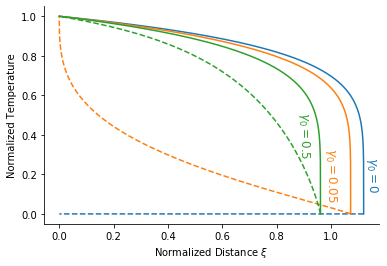

In [8]:
#Plot of time dependent with sample gamma0 values, m = 3/2
plt.figure(1)
m=3/2
ax=plt.gca()
for j in range(I):
    gamma0=gamma0_list[j]
    minval = optimize.brentq(opt_fun_DOP_time, .8,1.2)
    print(minval)
    sol = integrate.solve_ivp(RHSfun_time, (minval-tol,0), ICt, method='DOP853', max_step = 1e-4)
    X=[minval]
    Y1=[0]
    Y2=[0]
    for i in range(len(sol.t)):
        X.append(sol.t[i])
        Y1.append(sol.y[0][i])
        Y2.append(sol.y[2][i])
    plt.plot(X, Y1, label=r"K=%.2f" %(gamma0), c = cmap(j))
    plt.plot(X, Y2,'--', c = cmap(j))
    
ax.text(.9,.4,r'$\gamma_0=0.5$',horizontalalignment='center', verticalalignment='center',rotation=270,fontsize = 12,c=cmap(2))
ax.text(1,.2,r'$\gamma_0=0.05$',horizontalalignment='center', verticalalignment='center',rotation=270,fontsize = 12,c=cmap(1))
ax.text(1.15,.2,r'$\gamma_0=0$',horizontalalignment='center', verticalalignment='center',rotation=270,fontsize = 12,c=cmap(0))

plt.xlabel(r"Normalized Distance $\xi$")
plt.ylabel("Normalized Temperature")
#plt.title(r"Time Dependent $\gamma$ m=3/2")

show("timedependentm=1.5")


### m=0

C:\Users\wbenn\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


1.1199355535067115


C:\Users\wbenn\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


1.0853764306868992


C:\Users\wbenn\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


0.9861493703695251


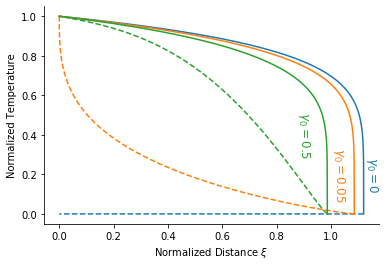

In [9]:
plt.figure(2)
ax=plt.gca()
m=0
ax=plt.gca()
for j in range(I):
    gamma0=gamma0_list[j]
    minval = optimize.brentq(opt_fun_DOP_time, .8,1.2)
    print(minval)
    sol = integrate.solve_ivp(RHSfun_time, (minval-tol,0), ICt, method='DOP853', max_step = 1e-4)
    X=[minval]
    Y1=[0]
    Y2=[0]
    for i in range(len(sol.t)):
        X.append(sol.t[i])
        Y1.append(sol.y[0][i])
        Y2.append(sol.y[2][i])
    plt.plot(X, Y1, label=r"K=%.2f" %(gamma0), c = cmap(j))
    plt.plot(X, Y2,'--', c = cmap(j))
    
ax.text(.9,.4,r'$\gamma_0=0.5$',horizontalalignment='center', verticalalignment='center',rotation=270,fontsize = 12,c=cmap(2))
ax.text(1.03,.2,r'$\gamma_0=0.05$',horizontalalignment='center', verticalalignment='center',rotation=270,fontsize = 12,c=cmap(1))
ax.text(1.15,.2,r'$\gamma_0=0$',horizontalalignment='center', verticalalignment='center',rotation=270,fontsize = 12,c=cmap(0))

plt.xlabel(r"Normalized Distance $\xi$")
plt.ylabel("Normalized Temperature")
show("timedependentm=0")

### Space dependent $\gamma_0$ plots 

### m=3/2

1.1194914733499686


C:\Users\wbenn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


1.0426303573267706
0.9479195968233898


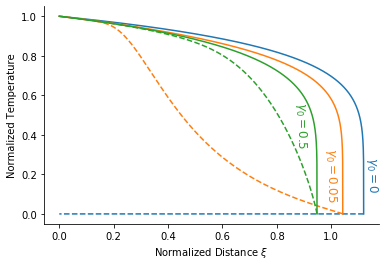

In [10]:
#Plot of space dependent with sample K values
plt.figure(3)
m=3/2
ax=plt.gca()
for j in range(I):
    gamma0=gamma0_list[j]
    minval = optimize.brentq(opt_fun_BDF_space, .8,1.2)
    print(minval)
    sol = integrate.solve_ivp(RHSfun_space, (minval-tol,1e-10), ICs, method='BDF', max_step = 1e-4)
    X=[minval]
    Y1=[0]
    Y2=[0]
    for i in range(len(sol.t)):
        X.append(sol.t[i])
        Y1.append(sol.y[0][i])
        Y2.append(sol.y[2][i])
    plt.plot(X, Y1, label=r"K=%.2f" %(gamma0), c = cmap(j))
    plt.plot(X, Y2,'--', c = cmap(j))
ax.text(.89,.45,r'$\gamma_0=0.5$',horizontalalignment='center', verticalalignment='center',rotation=270,fontsize = 12,c=cmap(2))
ax.text(1,.2,r'$\gamma_0=0.05$',horizontalalignment='center', verticalalignment='center',rotation=270,fontsize = 12,c=cmap(1))
ax.text(1.15,.2,r'$\gamma_0=0$',horizontalalignment='center', verticalalignment='center',rotation=270,fontsize = 12,c=cmap(0))
plt.xlabel(r"Normalized Distance $\xi$")
plt.ylabel("Normalized Temperature")
#plt.title(r"Space Dependent $\gamma$ m=3/2")

show("spacedependent_m=1.5")

### m =0

1.1194914733499686
1.056764714987959
0.9688581549287385


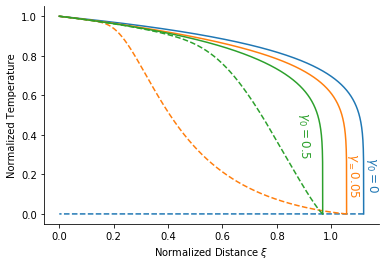

In [11]:
plt.figure(4)
m=0
ax=plt.gca()
for j in range(I):
    gamma0=gamma0_list[j]
    minval = optimize.brentq(opt_fun_BDF_space, .8,1.2)
    print(minval)
    sol = integrate.solve_ivp(RHSfun_space, (minval-tol,1e-10), ICs, method='BDF', max_step = 1e-4)
    X=[minval]
    Y1=[0]
    Y2=[0]
    for i in range(len(sol.t)):
        X.append(sol.t[i])
        Y1.append(sol.y[0][i])
        Y2.append(sol.y[2][i])
    plt.plot(X, Y1, label=r"K=%.2f" %(gamma0), c = cmap(j))
    plt.plot(X, Y2,'--', c = cmap(j))
ax.text(.9,.4,r'$\gamma_0=0.5$',horizontalalignment='center', verticalalignment='center',rotation=270,fontsize = 12,c=cmap(2))
ax.text(1.08,.2,r'$\gamma_=0.05$',horizontalalignment='center', verticalalignment='center',rotation=270,fontsize = 12,c=cmap(1))
ax.text(1.15,.2,r'$\gamma_0=0$',horizontalalignment='center', verticalalignment='center',rotation=270,fontsize = 12,c=cmap(0))
plt.xlabel(r"Normalized Distance $\xi$")
plt.ylabel("Normalized Temperature")
#plt.title(r"Space Dependent $\gamma$ m=0")

show("spacedependent_m=0")